# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


Training set: (50000, 32, 32, 3) Testing set: (10000, 32, 32, 3)


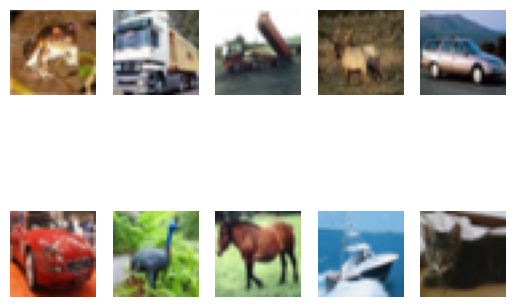

In [5]:
# Your code here :
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

# Load dataset (x = images, y = labels)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Training set:", x_train.shape, "Testing set:", x_test.shape)

# Show 10 random images from training set
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

#Neural networks train better when pixel values are small.
#Currently, pixel values are between 0 and 255. We scale them down to 0–1.

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#Labels like “0”, “1”, “2” are
#converted into one-hot encoded vectors so the model can classify among multiple classes.

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)





## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [ ]:
from keras.backend import clear_session
clear_session()

In [6]:
# Your code here :

from keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Clear any previous models
clear_session()

# Build the model, build the network layer-by-layer in a straight line—from input to output.
model = Sequential()

# Convolutional layer: extracts features from images
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Pooling layer: reduces spatial dimensions
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten: converts 2D features to 1D
model.add(Flatten())

# Dense layer: learns complex patterns
model.add(Dense(100, activation='relu'))

# Output layer: classifies into 10 classes
model.add(Dense(10, activation='softmax'))

# Display model architecture
model.summary()

#The model scans
#each image piece by piece and detects simple features like “this patch looks like an edge or a corner.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [11]:
# Your code here :
model.compile(
    loss='categorical_crossentropy',  # Loss function for multi-class
    optimizer='SGD',                   # Stochastic Gradient Descent
    metrics=['accuracy']               # Track accuracy during training
)

# Train for 50 epochs with batch size 512
history = model.fit(
    x_train, y_train,
    validation_split=0.1,  # Use 10% of training data for validation
    epochs=10,
    batch_size=512,
    verbose=2              # Print progress
)



Epoch 1/10
88/88 - 6s - 71ms/step - accuracy: 0.1723 - loss: 2.2607 - val_accuracy: 0.2288 - val_loss: 2.2131
Epoch 2/10
88/88 - 5s - 60ms/step - accuracy: 0.2593 - loss: 2.1498 - val_accuracy: 0.2868 - val_loss: 2.0897
Epoch 3/10
88/88 - 1s - 10ms/step - accuracy: 0.2990 - loss: 2.0315 - val_accuracy: 0.3122 - val_loss: 1.9972
Epoch 4/10
88/88 - 1s - 10ms/step - accuracy: 0.3206 - loss: 1.9578 - val_accuracy: 0.3246 - val_loss: 1.9441
Epoch 5/10
88/88 - 1s - 10ms/step - accuracy: 0.3334 - loss: 1.9162 - val_accuracy: 0.3244 - val_loss: 1.9155
Epoch 6/10
88/88 - 1s - 10ms/step - accuracy: 0.3427 - loss: 1.8869 - val_accuracy: 0.3470 - val_loss: 1.8826
Epoch 7/10
88/88 - 1s - 10ms/step - accuracy: 0.3526 - loss: 1.8613 - val_accuracy: 0.3538 - val_loss: 1.8598
Epoch 8/10
88/88 - 1s - 12ms/step - accuracy: 0.3631 - loss: 1.8386 - val_accuracy: 0.3522 - val_loss: 1.8427
Epoch 9/10
88/88 - 1s - 12ms/step - accuracy: 0.3701 - loss: 1.8170 - val_accuracy: 0.3678 - val_loss: 1.8212
Epoch 10/1

*   Plot the cross entropy loss curve and the accuracy curve

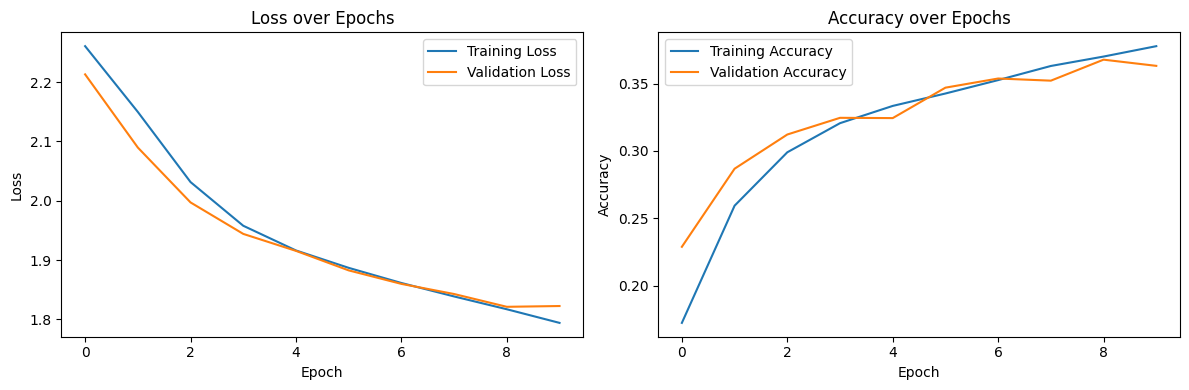

In [12]:
# Your code here :
import matplotlib.pyplot as plt

# Plot loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()



## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [ ]:
from keras.backend import clear_session
clear_session()

In [13]:
# Your code here :
from keras.backend import clear_session
clear_session()

model_vgg = Sequential()

# Two convolutional layers with 32 filters
model_vgg.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_vgg.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_vgg.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and classify
model_vgg.add(Flatten())
model_vgg.add(Dense(128, activation='relu'))
model_vgg.add(Dense(10, activation='softmax'))

model_vgg.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [14]:
# Your code here :

model_vgg.compile(
    loss='categorical_crossentropy',
    optimizer='SGD',
    metrics=['accuracy']
)

history_vgg = model_vgg.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=512,
    verbose=2
)


Epoch 1/50
88/88 - 10s - 117ms/step - accuracy: 0.1788 - loss: 2.2345 - val_accuracy: 0.2162 - val_loss: 2.1497
Epoch 2/50
88/88 - 2s - 24ms/step - accuracy: 0.2617 - loss: 2.0693 - val_accuracy: 0.2610 - val_loss: 2.0554
Epoch 3/50
88/88 - 2s - 24ms/step - accuracy: 0.3016 - loss: 1.9814 - val_accuracy: 0.3304 - val_loss: 1.9223
Epoch 4/50
88/88 - 2s - 24ms/step - accuracy: 0.3282 - loss: 1.9195 - val_accuracy: 0.3184 - val_loss: 1.9174
Epoch 5/50
88/88 - 2s - 25ms/step - accuracy: 0.3494 - loss: 1.8609 - val_accuracy: 0.3442 - val_loss: 1.8427
Epoch 6/50
88/88 - 2s - 26ms/step - accuracy: 0.3609 - loss: 1.8271 - val_accuracy: 0.3690 - val_loss: 1.8073
Epoch 7/50
88/88 - 2s - 25ms/step - accuracy: 0.3754 - loss: 1.7821 - val_accuracy: 0.3702 - val_loss: 1.7806
Epoch 8/50
88/88 - 2s - 25ms/step - accuracy: 0.3860 - loss: 1.7518 - val_accuracy: 0.3916 - val_loss: 1.7399
Epoch 9/50
88/88 - 2s - 26ms/step - accuracy: 0.3963 - loss: 1.7300 - val_accuracy: 0.3792 - val_loss: 1.7421
Epoch 10

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


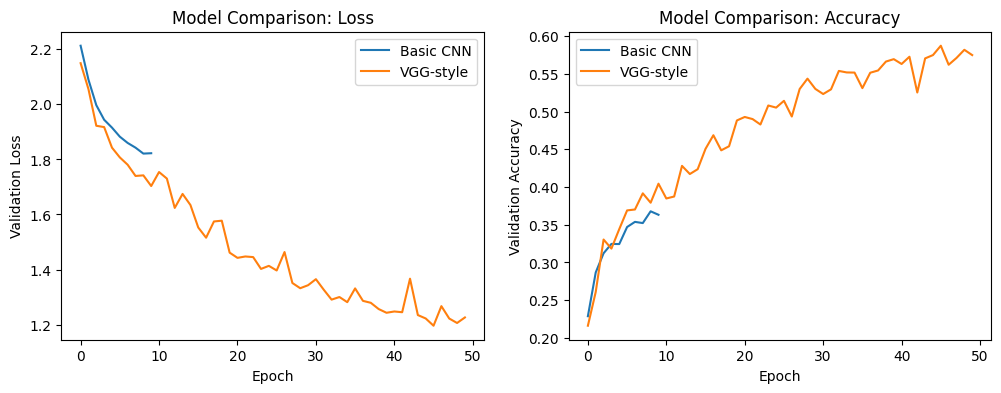

In [15]:
# Your code here :
# Plot comparison
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['val_loss'], label='Basic CNN')
plt.plot(history_vgg.history['val_loss'], label='VGG-style')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Model Comparison: Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'], label='Basic CNN')
plt.plot(history_vgg.history['val_accuracy'], label='VGG-style')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Model Comparison: Accuracy')
plt.legend()

plt.show()


**Comment on the observation**

*(Double-click or enter to edit)*
VGG-style should perform better (higher accuracy, lower loss)
...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


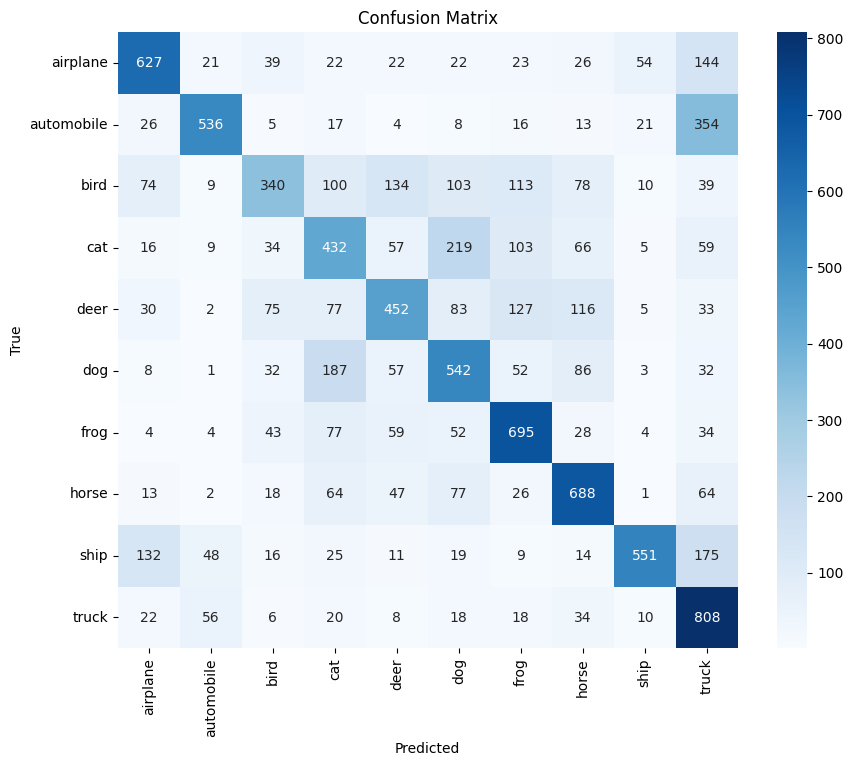

In [17]:
# Your code here :
from sklearn.metrics import confusion_matrix
import seaborn as sns

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


# Predict on test set
y_pred = model_vgg.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**Comment here :**

*classes that look visually similar are sometimes confused (e.g., ships vs airplanes, automobile vs truck), enter to edit)*

...

*    Print the test accuracy for the trained model.

In [18]:
# Your code here :

test_loss, test_acc = model_vgg.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')


313/313 - 2s - 6ms/step - accuracy: 0.5671 - loss: 1.2249
Test accuracy: 0.5671
Test loss: 1.2249


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [ ]:
from keras.backend import clear_session
clear_session()

In [19]:
# Your code here :
import cv2

# Resize images to 64x64
x_train_resized = np.array([cv2.resize(img, (64, 64)) for img in x_train])
x_test_resized = np.array([cv2.resize(img, (64, 64)) for img in x_test])

# Build full VGG
clear_session()
model_full_vgg = Sequential()

# Block 1: 2×Conv(64) + MaxPool
model_full_vgg.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model_full_vgg.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_full_vgg.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2: 2×Conv(128) + MaxPool
model_full_vgg.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_full_vgg.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_full_vgg.add(MaxPooling2D(pool_size=(2, 2)))

# Block 3: 2×Conv(256) + MaxPool
model_full_vgg.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_full_vgg.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_full_vgg.add(MaxPooling2D(pool_size=(2, 2)))

# Classifier
model_full_vgg.add(Flatten())
model_full_vgg.add(Dense(128, activation='relu'))
model_full_vgg.add(Dense(10, activation='softmax'))

model_full_vgg.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [ ]:
# Your code here :
model_full_vgg.compile(
    loss='categorical_crossentropy',
    optimizer='SGD',
    metrics=['accuracy']
)

history_full = model_full_vgg.fit(
    x_train_resized, y_train,
    validation_split=0.1,
    epochs=10,  # Fewer epochs due to larger model
    batch_size=512,
    verbose=2
)

# Evaluate
test_loss, test_acc = model_full_vgg.evaluate(x_test_resized, y_test)
print(f'Test accuracy: {test_acc:.4f}')


Epoch 1/10
88/88 - 125s - 1s/step - accuracy: 0.1281 - loss: 2.3000 - val_accuracy: 0.1676 - val_loss: 2.2970
Epoch 2/10
88/88 - 33s - 379ms/step - accuracy: 0.1610 - loss: 2.2928 - val_accuracy: 0.1474 - val_loss: 2.2861
Epoch 3/10
88/88 - 41s - 467ms/step - accuracy: 0.1521 - loss: 2.2732 - val_accuracy: 0.2044 - val_loss: 2.2491
Epoch 4/10
88/88 - 33s - 378ms/step - accuracy: 0.2106 - loss: 2.1896 - val_accuracy: 0.2046 - val_loss: 2.1969
Epoch 5/10
88/88 - 33s - 380ms/step - accuracy: 0.2470 - loss: 2.0993 - val_accuracy: 0.2900 - val_loss: 2.0242
Epoch 6/10


# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:SPotting patterns



_

2 - Key Differences between sigmoid and softmax: softmax is better for multi class, sigmois better for two classes



_

3 - Key Differences between categorical crossentropy and binary crossentropy loss: binary crossentropy is for just two classes and categoriacal is better when you have many


_
